# Imports

In [1]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, GRU, Flatten, Conv2D, Conv1D, MaxPooling2D, MaxPooling1D
from keras import Model, layers
from tensorflow.keras import activations,regularizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.utils import plot_model

from keras.optimizers import SGD
from keras.regularizers import l2

import matplotlib.pyplot as plt




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load data

In [31]:
X=  np.load('/content/drive/MyDrive/Colab Notebooks/train_images.npy', allow_pickle=True)
y =  np.load('/content/drive/MyDrive/Colab Notebooks/train_labels.npy', allow_pickle=True)
val_images=np.load('/content/drive/MyDrive/Colab Notebooks/val_images.npy',allow_pickle=True)

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# dataprep

In [33]:
X = X/255


In [20]:
X=X.reshape(-1,28,28)

In [34]:
y=y.reshape(-1,1)

In [7]:

ohe=OneHotEncoder(sparse=False)
ohe.fit(y)
y_ohe=ohe.transform(y)

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X, y_ohe, test_size=0.2, random_state=420)

In [9]:
print(X.shape)
print(y.shape)

(68000, 28, 28)
(68000, 1)


# 93% CNN

In [10]:
model = Sequential()


model.add(Conv2D(32, kernel_size=(4, 4),activation='relu',kernel_initializer='he_normal',input_shape=(28, 28,1)))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size=(3, 3),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3),padding="same", activation='relu'))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size=(3, 3), padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(2, 2),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

# compile

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_121 (Conv2D)         (None, 25, 25, 32)        544       
                                                                 
 dropout_89 (Dropout)        (None, 25, 25, 32)        0         
                                                                 
 conv2d_122 (Conv2D)         (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_90 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 conv2d_123 (Conv2D)         (None, 12, 12, 128)       73856     
                                                     

# Plot model

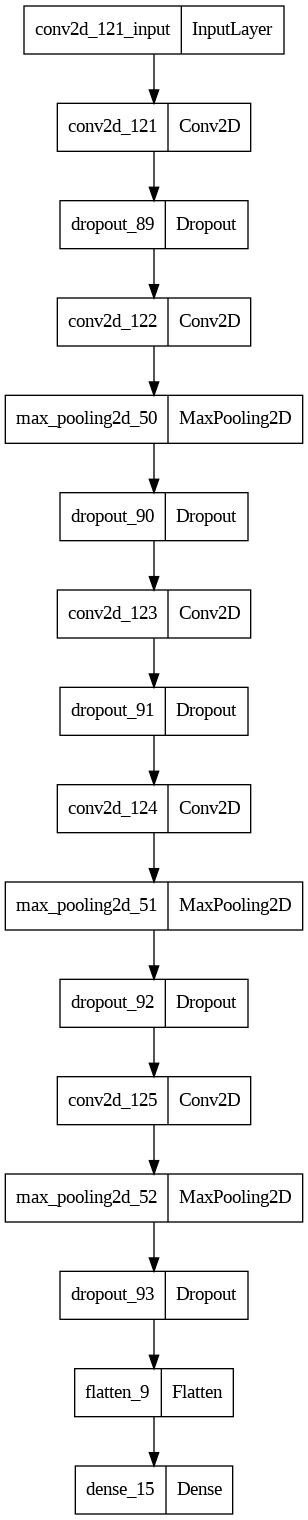

In [ ]:
plot_model(model, to_file='model.png')

# History

In [ ]:
history=model.fit(X_train, y_train, validation_data=[X_test,y_test],batch_size=128, epochs=30)

Epoch 1/30
425/425 [==============================] - 7s 15ms/step - loss: 0.6755 - accuracy: 0.7547 - val_loss: 0.4117 - val_accuracy: 0.8553
Epoch 2/30
425/425 [==============================] - 6s 14ms/step - loss: 0.4010 - accuracy: 0.8524 - val_loss: 0.3392 - val_accuracy: 0.8763
Epoch 3/30
425/425 [==============================] - 6s 14ms/step - loss: 0.3382 - accuracy: 0.8769 - val_loss: 0.2892 - val_accuracy: 0.8943
Epoch 4/30
425/425 [==============================] - 6s 14ms/step - loss: 0.3025 - accuracy: 0.8898 - val_loss: 0.2644 - val_accuracy: 0.9040
Epoch 5/30
425/425 [==============================] - 6s 15ms/step - loss: 0.2790 - accuracy: 0.8980 - val_loss: 0.2438 - val_accuracy: 0.9101
Epoch 6/30
425/425 [==============================] - 6s 15ms/step - loss: 0.2572 - accuracy: 0.9062 - val_loss: 0.2435 - val_accuracy: 0.9118
Epoch 7/30
425/425 [==============================] - 6s 14ms/step - loss: 0.2469 - accuracy: 0.9099 - val_loss: 0.2300 - val_accuracy: 0.9168

# Plot acc

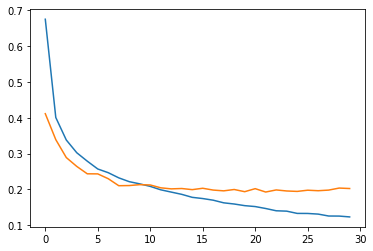

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

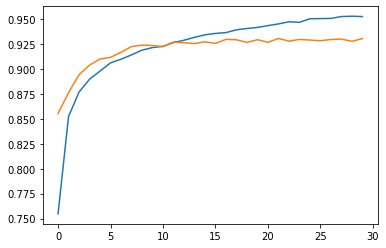

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20265522599220276
Test accuracy: 0.9305882453918457


# Save

In [ ]:
X_val = val_images
X_val = X_val/255
X_val = X_val.reshape(-1,28,28,1)
y_val_pred = model.predict(X_val)
np.round(y_val_pred[0,:],2)
y_val_pred_class = np.argmax(y_val_pred, axis=1)

63/63 [==============================] - 0s 4ms/step


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(X_val)

63/63 [==============================] - 0s 2ms/step


In [ ]:
predictions=np.argmax(predictions,axis=1)

In [ ]:
len(predictions)

2000

In [ ]:
my_name = r'elanoris'
np.save(f'/content/drive/MyDrive/{my_name}_predictions.npy', predictions)